## Business Goal

#### You are required to model the price of used cars with the available independent variables

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': [12, 10]},font_scale=1.2)

## Step 1: Reading and Understanding the Data

In [101]:
df=pd.read_csv("car.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

## Step 2 : Data Cleaning and Preparation

#### 1)ID

In [103]:
df.duplicated().sum()

313

In [104]:
df.drop_duplicates(inplace= True)

In [105]:
df.drop(["ID"],inplace=True,axis=1)

<AxesSubplot:ylabel='Price'>

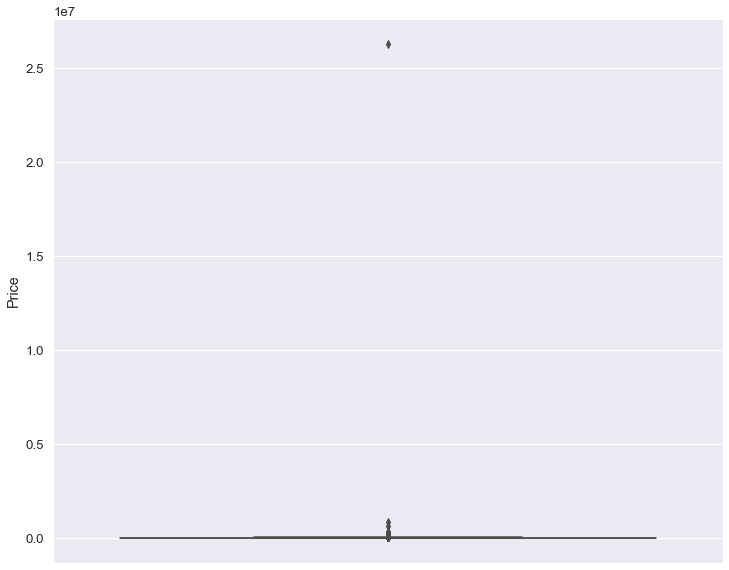

In [106]:
sns.boxplot(y='Price',data=df)

In [107]:
from datasist.structdata import detect_outliers

out_lier=detect_outliers(df,0,['Price'])
print(len( out_lier))
df.drop(out_lier,inplace=True)

1055


<AxesSubplot:ylabel='Price'>

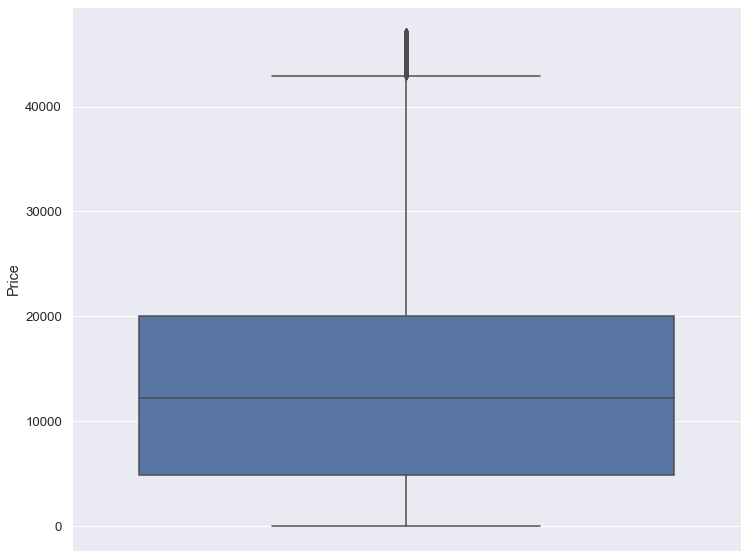

In [108]:
sns.boxplot(y='Price',data=df)

## Step 3: Visualization the data

#### 2)Manufacturer

In [109]:

df["Manufacturer"].describe()

count      17869
unique        61
top       TOYOTA
freq        3502
Name: Manufacturer, dtype: object

C:\Users\MAS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4321 (\N{GEORGIAN LETTER SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MAS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4334 (\N{GEORGIAN LETTER XAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MAS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4309 (\N{GEORGIAN LETTER VIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MAS\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 4304 (\N{GEORGIAN LETTER AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


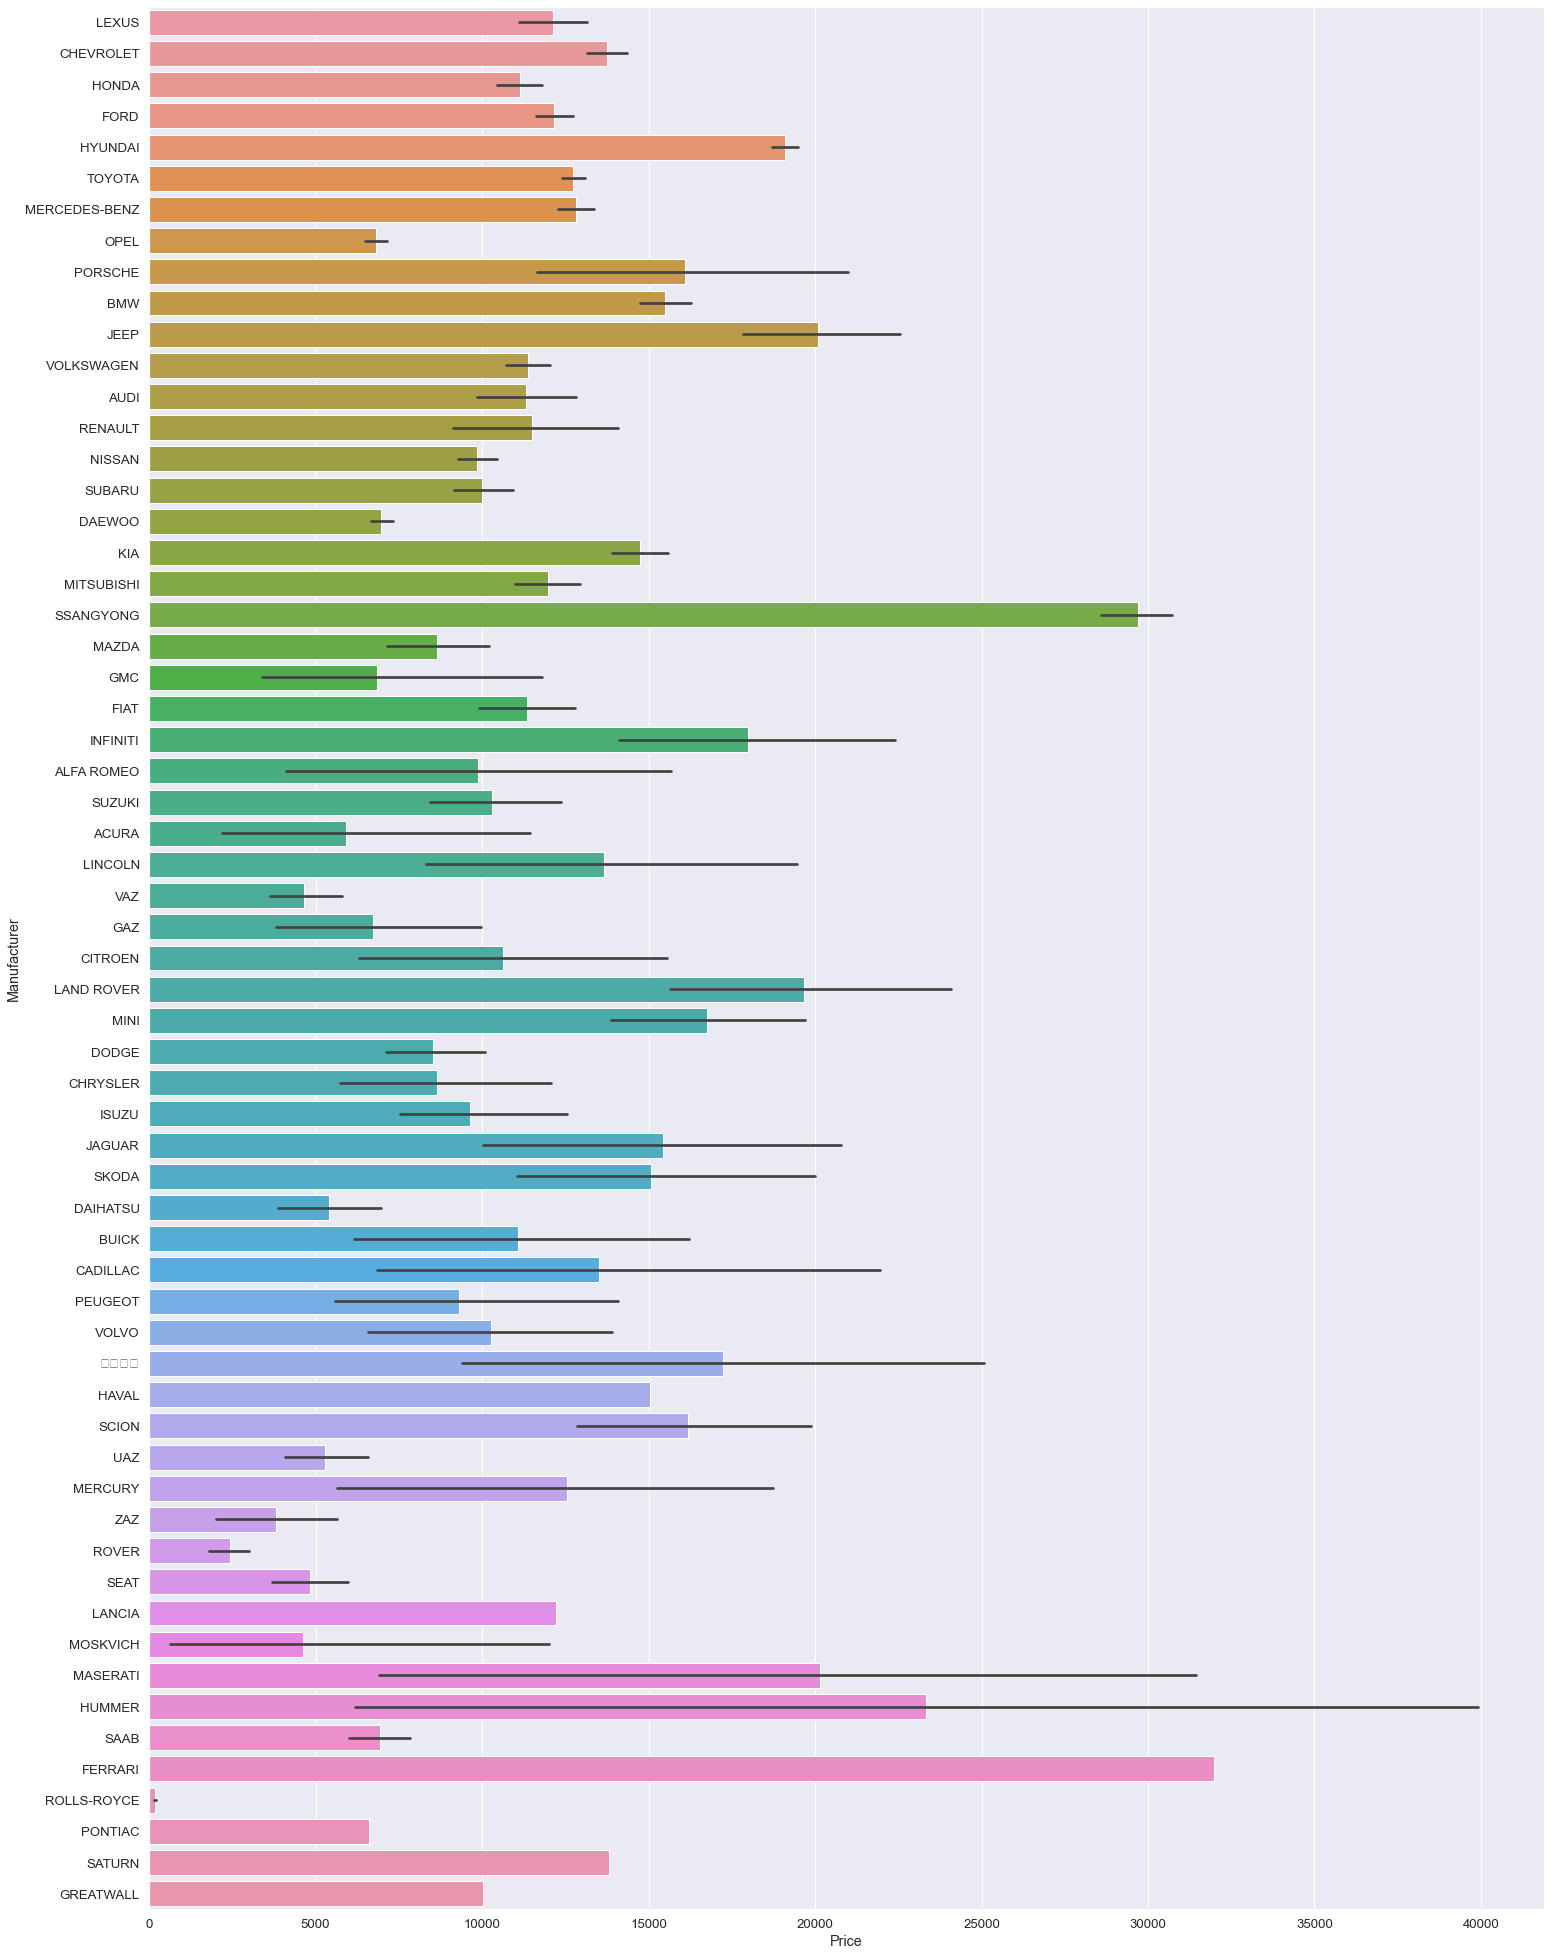

In [110]:
sns.set(rc={'figure.figsize': [25, 35]}, font_scale=1.2,)
sns.barplot(y="Manufacturer",x="Price",data=df);

In [112]:
co_Manufacturer=df['Manufacturer'].value_counts().head(6)
co_Manufacturer

TOYOTA           3502
HYUNDAI          3425
MERCEDES-BENZ    1874
FORD             1035
CHEVROLET        1021
BMW               953
Name: Manufacturer, dtype: int64

In [113]:
Manufacturer=co_Manufacturer.index
Manufacturer

Index(['TOYOTA', 'HYUNDAI', 'MERCEDES-BENZ', 'FORD', 'CHEVROLET', 'BMW'], dtype='object')

In [114]:
df["Manufacturer"]=df["Manufacturer"].apply(lambda x: x if x in Manufacturer else "Other" )

In [115]:
df=pd.get_dummies(df,columns=["Manufacturer"])

In [116]:
df

,Price,Levy,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,Wheel,Color,Airbags,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_FORD,Manufacturer_HYUNDAI,Manufacturer_MERCEDES-BENZ,Manufacturer_Other,Manufacturer_TOYOTA
0,13328,1399,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,...,Left wheel,Silver,12,0,0,0,0,0,1,0
1,16621,1018,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,...,Left wheel,Black,8,0,1,0,0,0,0,0
2,8467,-,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,...,Right-hand drive,Black,2,0,0,0,0,0,1,0
3,3607,862,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,...,Left wheel,White,0,0,0,1,0,0,0,0
4,11726,446,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,...,Left wheel,Silver,4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,...,Left wheel,Silver,5,0,0,0,0,1,0,0
19233,15681,831,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,...,Left wheel,Red,8,0,0,0,1,0,0,0
19234,26108,836,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,...,Left wheel,Grey,4,0,0,0,1,0,0,0
19235,5331,1288,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,...,Left wheel,Black,4,0,1,0,0,0,0,0


#### 4)Model ,5) Levy

In [117]:
df["Model"].describe()

count     17869
unique     1498
top       Prius
freq       1068
Name: Model, dtype: object

In [118]:
df.drop(["Model"],inplace=True,axis=1)

In [119]:
df.drop(["Levy"],inplace=True,axis=1)

#### 6)Engine volume

In [120]:
df["Engine volume"].str.find("Turbo")

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
19232    4
19233   -1
19234   -1
19235   -1
19236   -1
Name: Engine volume, Length: 17869, dtype: int64

In [121]:
a=df[df["Engine volume"].str.contains("Turbo")]

In [122]:
a

,Price,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,...,Wheel,Color,Airbags,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_FORD,Manufacturer_HYUNDAI,Manufacturer_MERCEDES-BENZ,Manufacturer_Other,Manufacturer_TOYOTA
23,7840,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,...,Left wheel,White,0,0,0,1,0,0,0,0
25,20385,2006,Sedan,Yes,Diesel,2.2 Turbo,210000 km,4.0,Tiptronic,Rear,...,Left wheel,Black,8,0,0,0,0,1,0,0
30,15681,2007,Goods wagon,No,Diesel,2.0 Turbo,180000 km,6.0,Manual,Rear,...,Left wheel,White,4,0,0,0,0,1,0,0
34,24462,2007,Jeep,Yes,Diesel,3.0 Turbo,250000 km,6.0,Tiptronic,4x4,...,Left wheel,Black,10,0,0,0,0,0,1,0
42,20165,2016,Sedan,Yes,Petrol,1.4 Turbo,11200 km,4.0,Tiptronic,Front,...,Left wheel,Black,8,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19167,18817,2003,Microbus,No,Diesel,2.4 Turbo,2147483647 km,4.0,Manual,Front,...,Left wheel,White,2,0,0,1,0,0,0,0
19170,10976,2001,Sedan,No,Diesel,2.2 Turbo,320000 km,5.0,Automatic,Rear,...,Left wheel,Silver,4,0,0,0,0,1,0,0
19190,24462,2012,Sedan,Yes,Petrol,2.0 Turbo,96966 km,4.0,Tiptronic,Rear,...,Left wheel,Black,12,1,0,0,0,0,0,0
19225,8781,2007,Goods wagon,No,Diesel,1.7 Turbo,236000 km,4.0,Manual,Front,...,Left wheel,Beige,4,0,0,0,0,0,1,0


In [123]:
df["Turbo"]=1
df["Turbo"].where(df["Engine volume"].str.contains("Turbo"),0,inplace=True)

In [124]:
df

,Price,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,...,Color,Airbags,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_FORD,Manufacturer_HYUNDAI,Manufacturer_MERCEDES-BENZ,Manufacturer_Other,Manufacturer_TOYOTA,Turbo
0,13328,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,...,Silver,12,0,0,0,0,0,1,0,0
1,16621,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,...,Black,8,0,1,0,0,0,0,0,0
2,8467,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,...,Black,2,0,0,0,0,0,1,0,0
3,3607,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,...,White,0,0,0,1,0,0,0,0,0
4,11726,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,...,Silver,4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,...,Silver,5,0,0,0,0,1,0,0,1
19233,15681,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,...,Red,8,0,0,0,1,0,0,0,0
19234,26108,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,...,Grey,4,0,0,0,1,0,0,0,0
19235,5331,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,...,Black,4,0,1,0,0,0,0,0,0


In [125]:
set(df.loc[df["Engine volume"].str.contains("Turbo"),"Turbo"])

{1}

In [126]:
for i in range(len(df)):
    df.iloc[i,5]=df.iloc[i,5].replace("Turbo","")

In [127]:
df[df["Engine volume"].str.contains("Turbo")]

,Price,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,...,Color,Airbags,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_FORD,Manufacturer_HYUNDAI,Manufacturer_MERCEDES-BENZ,Manufacturer_Other,Manufacturer_TOYOTA,Turbo


In [128]:
df["Engine volume"]=df["Engine volume"].astype(float)

#### 7)Cylinders

In [129]:
df["Cylinders"]=df["Cylinders"].astype(int)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17869 entries, 0 to 19236
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       17869 non-null  int64  
 1   Prod. year                  17869 non-null  int64  
 2   Category                    17869 non-null  object 
 3   Leather interior            17869 non-null  object 
 4   Fuel type                   17869 non-null  object 
 5   Engine volume               17869 non-null  float64
 6   Mileage                     17869 non-null  object 
 7   Cylinders                   17869 non-null  int32  
 8   Gear box type               17869 non-null  object 
 9   Drive wheels                17869 non-null  object 
 10  Doors                       17869 non-null  object 
 11  Wheel                       17869 non-null  object 
 12  Color                       17869 non-null  object 
 13  Airbags                     178

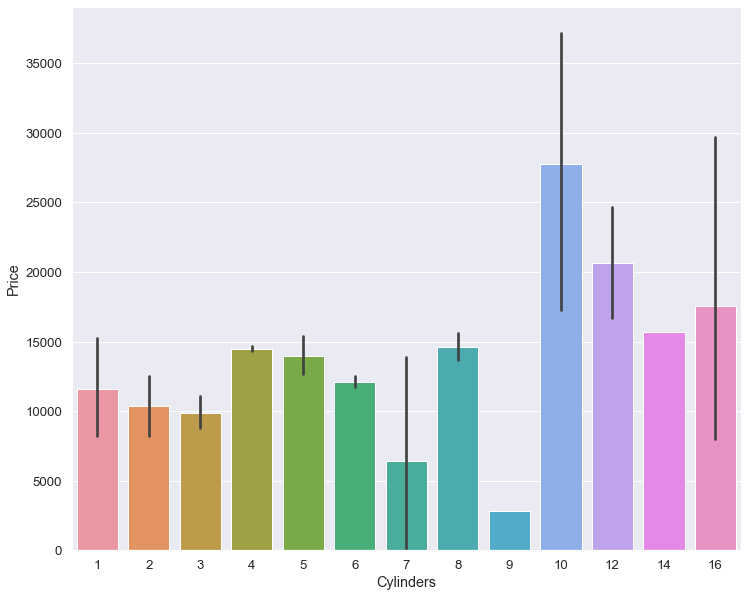

In [131]:
sns.barplot (x="Cylinders",y="Price",data=df);

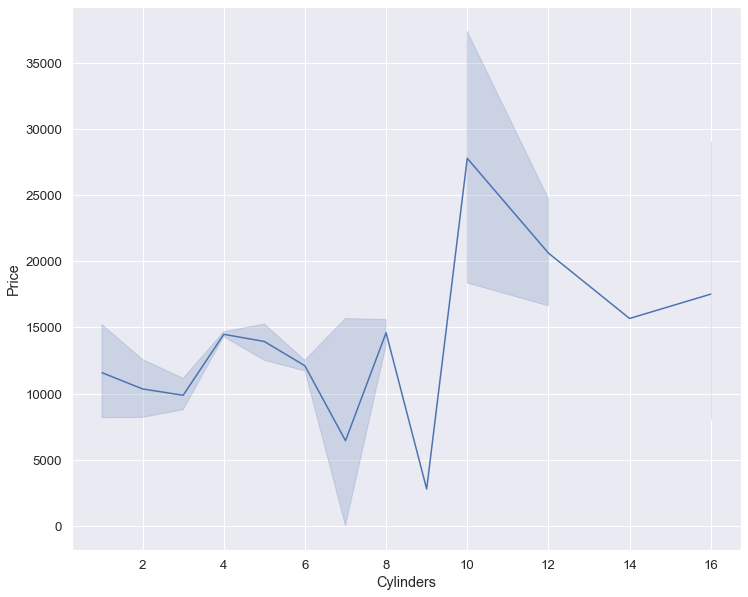

In [132]:
sns.lineplot (x="Cylinders",y="Price",data=df);

#### 8)Leather interior

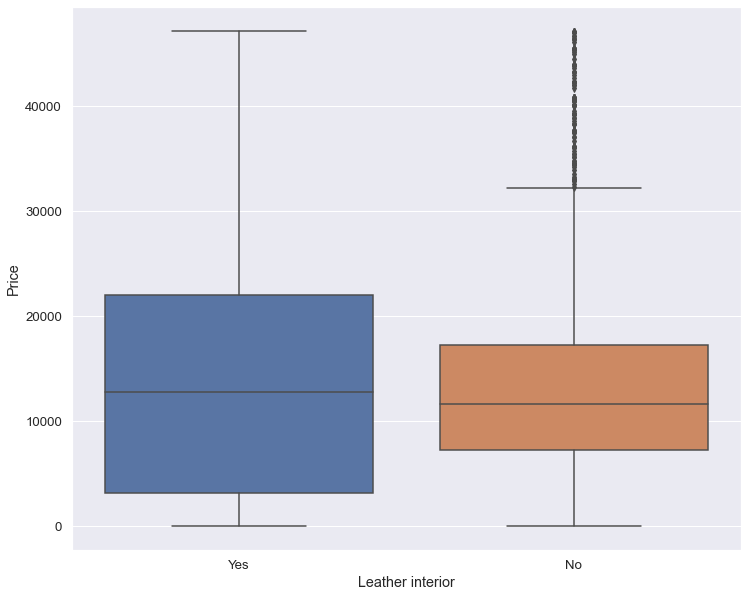

In [133]:
sns.boxplot (x="Leather interior",y="Price",data=df);
    

<AxesSubplot:xlabel='Leather interior', ylabel='count'>

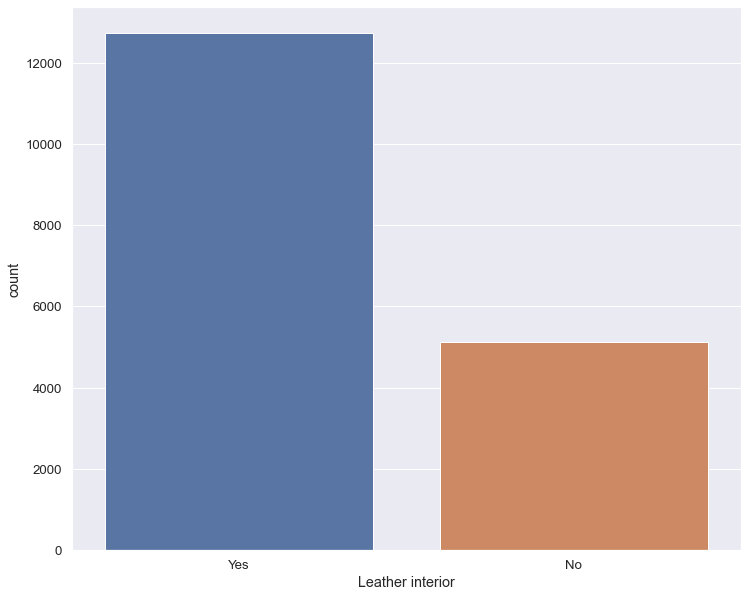

In [134]:
sns.countplot(x="Leather interior",data=df)

In [135]:
df=pd.get_dummies(df,columns=["Leather interior"],drop_first=True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17869 entries, 0 to 19236
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       17869 non-null  int64  
 1   Prod. year                  17869 non-null  int64  
 2   Category                    17869 non-null  object 
 3   Fuel type                   17869 non-null  object 
 4   Engine volume               17869 non-null  float64
 5   Mileage                     17869 non-null  object 
 6   Cylinders                   17869 non-null  int32  
 7   Gear box type               17869 non-null  object 
 8   Drive wheels                17869 non-null  object 
 9   Doors                       17869 non-null  object 
 10  Wheel                       17869 non-null  object 
 11  Color                       17869 non-null  object 
 12  Airbags                     17869 non-null  int64  
 13  Manufacturer_BMW            178

#### 9) Mileage

In [137]:
for i in range(len(df)):
    df.iloc[i,5]=df.iloc[i,5].replace("km","")

In [138]:
df.head()

,Price,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,...,Airbags,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_FORD,Manufacturer_HYUNDAI,Manufacturer_MERCEDES-BENZ,Manufacturer_Other,Manufacturer_TOYOTA,Turbo,Leather interior_Yes
0,13328,2010,Jeep,Hybrid,3.5,186005,6,Automatic,4x4,04-May,...,12,0,0,0,0,0,1,0,0,1
1,16621,2011,Jeep,Petrol,3.0,192000,6,Tiptronic,4x4,04-May,...,8,0,1,0,0,0,0,0,0,0
2,8467,2006,Hatchback,Petrol,1.3,200000,4,Variator,Front,04-May,...,2,0,0,0,0,0,1,0,0,0
3,3607,2011,Jeep,Hybrid,2.5,168966,4,Automatic,4x4,04-May,...,0,0,0,1,0,0,0,0,0,1
4,11726,2014,Hatchback,Petrol,1.3,91901,4,Automatic,Front,04-May,...,4,0,0,0,0,0,1,0,0,1


In [139]:
df["Mileage"]=df["Mileage"].astype(int)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17869 entries, 0 to 19236
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       17869 non-null  int64  
 1   Prod. year                  17869 non-null  int64  
 2   Category                    17869 non-null  object 
 3   Fuel type                   17869 non-null  object 
 4   Engine volume               17869 non-null  float64
 5   Mileage                     17869 non-null  int32  
 6   Cylinders                   17869 non-null  int32  
 7   Gear box type               17869 non-null  object 
 8   Drive wheels                17869 non-null  object 
 9   Doors                       17869 non-null  object 
 10  Wheel                       17869 non-null  object 
 11  Color                       17869 non-null  object 
 12  Airbags                     17869 non-null  int64  
 13  Manufacturer_BMW            178

#### 10) Category

In [141]:
df["Category"].describe()

count     17869
unique       11
top       Sedan
freq       8318
Name: Category, dtype: object

<AxesSubplot:xlabel='Category', ylabel='Price'>

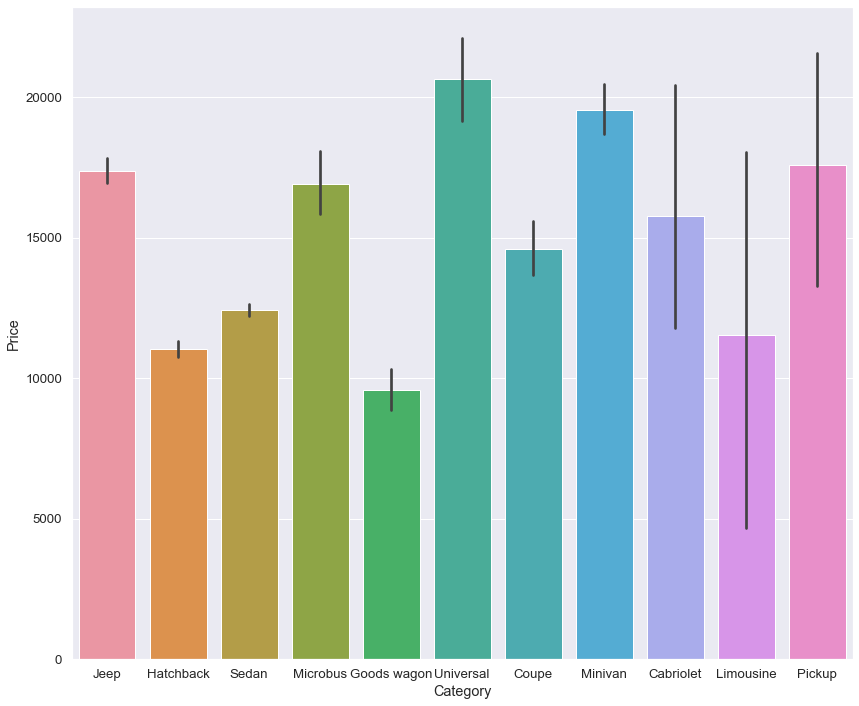

In [142]:
sns.set(rc={'figure.figsize': [14, 12]}, font_scale=1.2)
sns.barplot(x='Category',y="Price",data=df)

<AxesSubplot:xlabel='Category', ylabel='Price'>

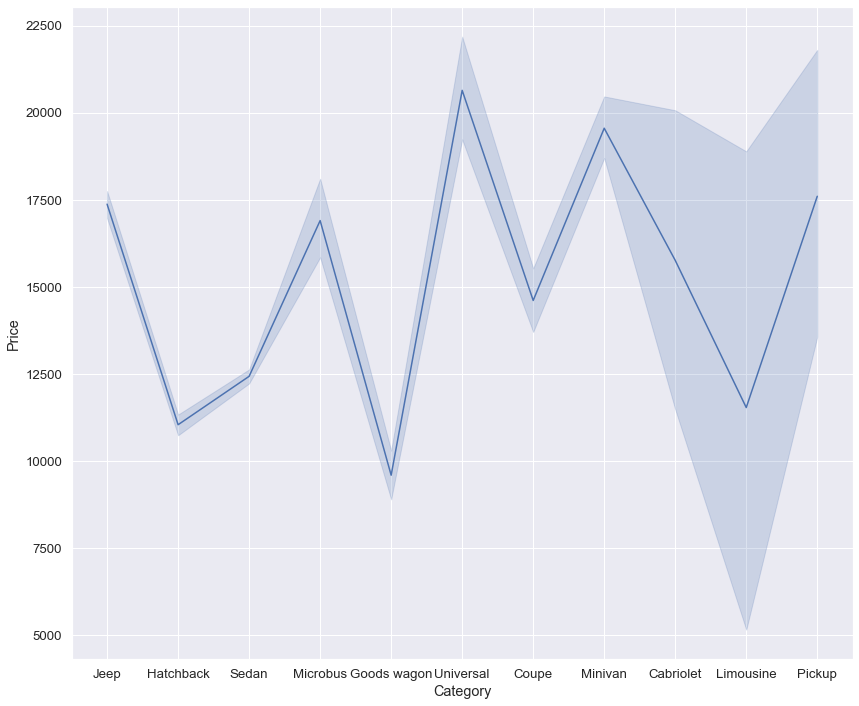

In [143]:
sns.lineplot(x="Category",y="Price",data=df)

<AxesSubplot:xlabel='Category', ylabel='count'>

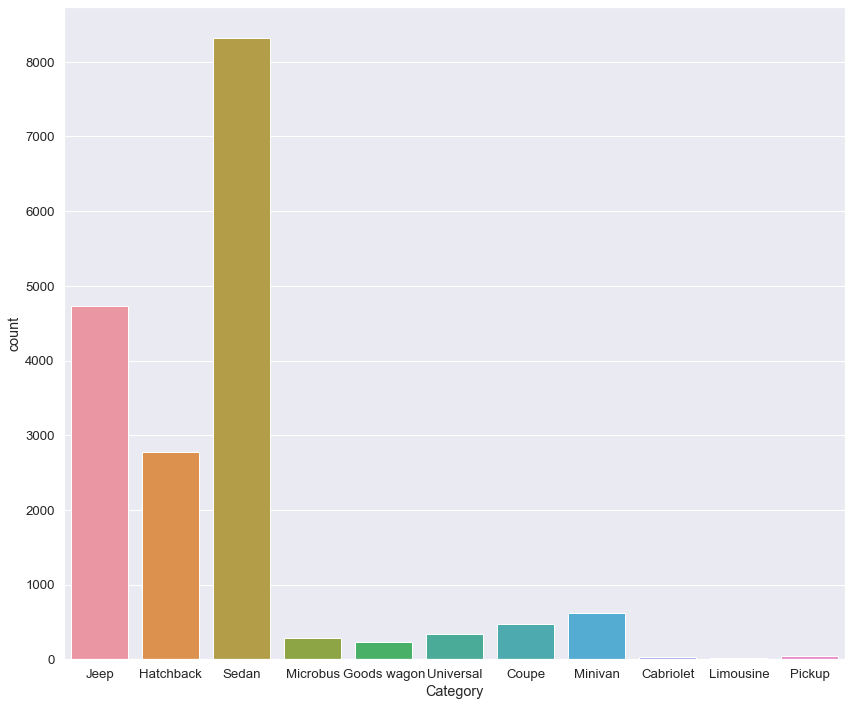

In [144]:
sns.countplot(x="Category",data=df)

In [145]:
co_Category=df["Category"].value_counts().head(6)
co_Category

Sedan        8318
Jeep         4736
Hatchback    2781
Minivan       620
Coupe         477
Universal     339
Name: Category, dtype: int64

In [146]:
Category= co_Category.index
Category

Index(['Sedan', 'Jeep', 'Hatchback', 'Minivan', 'Coupe', 'Universal'], dtype='object')

In [147]:
df["Category"]=df["Category"].apply(lambda x:x if x in Category else "Other")

In [148]:
df=pd.get_dummies(df,columns=["Category"])

In [149]:
df.head()

,Price,Prod. year,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,...,Manufacturer_TOYOTA,Turbo,Leather interior_Yes,Category_Coupe,Category_Hatchback,Category_Jeep,Category_Minivan,Category_Other,Category_Sedan,Category_Universal
0,13328,2010,Hybrid,3.5,186005,6,Automatic,4x4,04-May,Left wheel,...,0,0,1,0,0,1,0,0,0,0
1,16621,2011,Petrol,3.0,192000,6,Tiptronic,4x4,04-May,Left wheel,...,0,0,0,0,0,1,0,0,0,0
2,8467,2006,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,...,0,0,0,0,1,0,0,0,0,0
3,3607,2011,Hybrid,2.5,168966,4,Automatic,4x4,04-May,Left wheel,...,0,0,1,0,0,1,0,0,0,0
4,11726,2014,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,...,0,0,1,0,1,0,0,0,0,0


#### 11)Prod.year

<AxesSubplot:xlabel='Prod. year', ylabel='Price'>

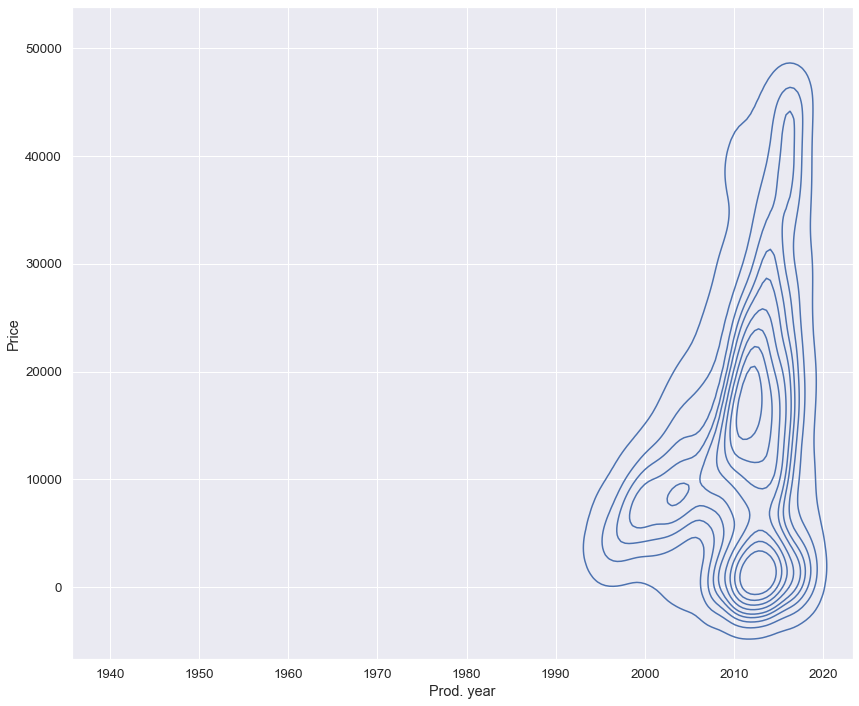

In [150]:
sns.kdeplot(x="Prod. year",y="Price",data=df)

In [151]:
#df["Prod. year"]=pd.to_datetime(df["Prod. year"],format="YYYY")

In [152]:
#df["Prod. year"]=df["Prod. year"].dt.year

In [153]:
df.head()

,Price,Prod. year,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,...,Manufacturer_TOYOTA,Turbo,Leather interior_Yes,Category_Coupe,Category_Hatchback,Category_Jeep,Category_Minivan,Category_Other,Category_Sedan,Category_Universal
0,13328,2010,Hybrid,3.5,186005,6,Automatic,4x4,04-May,Left wheel,...,0,0,1,0,0,1,0,0,0,0
1,16621,2011,Petrol,3.0,192000,6,Tiptronic,4x4,04-May,Left wheel,...,0,0,0,0,0,1,0,0,0,0
2,8467,2006,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,...,0,0,0,0,1,0,0,0,0,0
3,3607,2011,Hybrid,2.5,168966,4,Automatic,4x4,04-May,Left wheel,...,0,0,1,0,0,1,0,0,0,0
4,11726,2014,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,...,0,0,1,0,1,0,0,0,0,0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17869 entries, 0 to 19236
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       17869 non-null  int64  
 1   Prod. year                  17869 non-null  int64  
 2   Fuel type                   17869 non-null  object 
 3   Engine volume               17869 non-null  float64
 4   Mileage                     17869 non-null  int32  
 5   Cylinders                   17869 non-null  int32  
 6   Gear box type               17869 non-null  object 
 7   Drive wheels                17869 non-null  object 
 8   Doors                       17869 non-null  object 
 9   Wheel                       17869 non-null  object 
 10  Color                       17869 non-null  object 
 11  Airbags                     17869 non-null  int64  
 12  Manufacturer_BMW            17869 non-null  uint8  
 13  Manufacturer_CHEVROLET      178

#### 12) Fuel type

In [155]:
df["Fuel type"].describe()

count      17869
unique         7
top       Petrol
freq        9309
Name: Fuel type, dtype: object

<AxesSubplot:xlabel='Fuel type', ylabel='Price'>

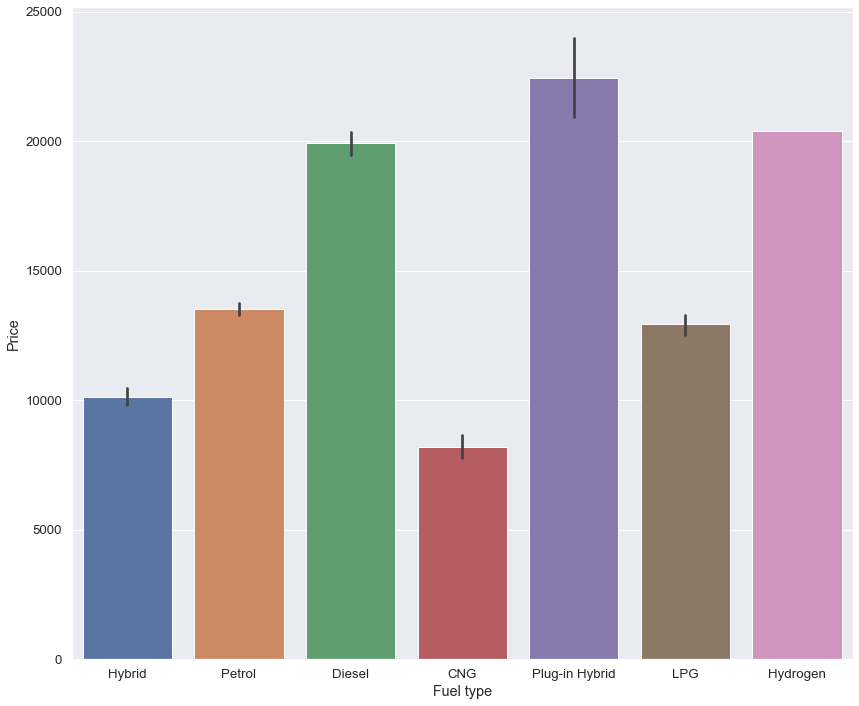

In [156]:
sns.barplot(x="Fuel type",y="Price",data=df)

<AxesSubplot:xlabel='Fuel type', ylabel='count'>

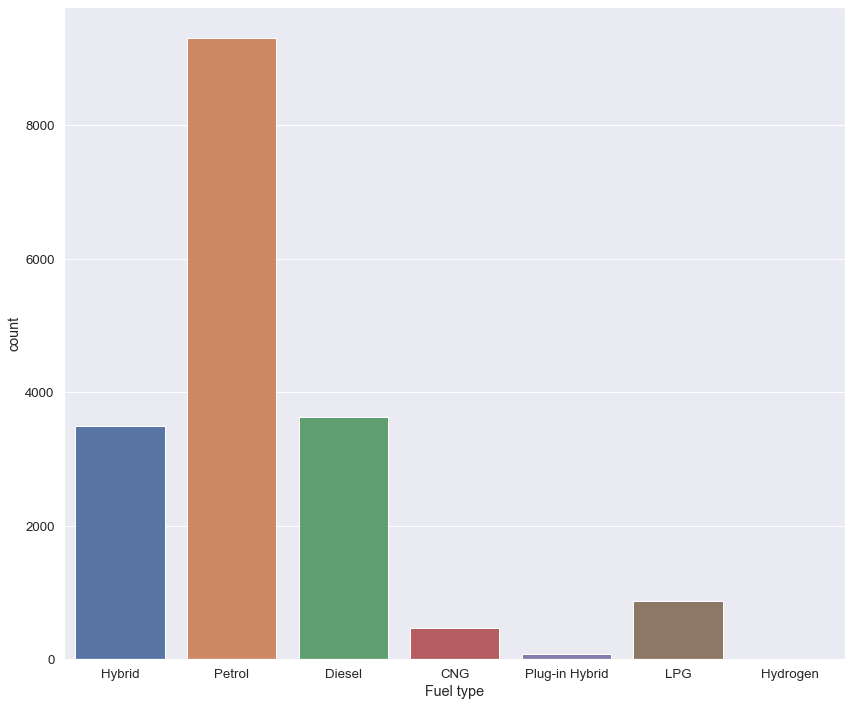

In [157]:
sns.countplot(x="Fuel type",data=df)

In [158]:
df=pd.get_dummies(df,columns=["Fuel type"],drop_first=True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17869 entries, 0 to 19236
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       17869 non-null  int64  
 1   Prod. year                  17869 non-null  int64  
 2   Engine volume               17869 non-null  float64
 3   Mileage                     17869 non-null  int32  
 4   Cylinders                   17869 non-null  int32  
 5   Gear box type               17869 non-null  object 
 6   Drive wheels                17869 non-null  object 
 7   Doors                       17869 non-null  object 
 8   Wheel                       17869 non-null  object 
 9   Color                       17869 non-null  object 
 10  Airbags                     17869 non-null  int64  
 11  Manufacturer_BMW            17869 non-null  uint8  
 12  Manufacturer_CHEVROLET      17869 non-null  uint8  
 13  Manufacturer_FORD           178

#### 13)Gear box type

In [160]:
df["Gear box type"].describe()

count         17869
unique            4
top       Automatic
freq          12593
Name: Gear box type, dtype: object

<AxesSubplot:xlabel='Gear box type', ylabel='Price'>

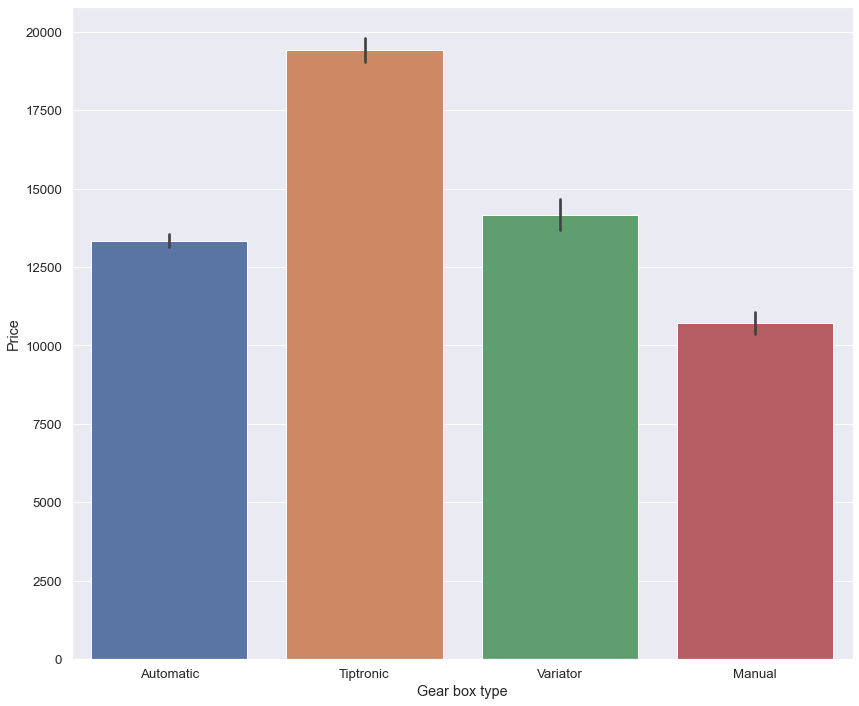

In [161]:
sns.barplot(x="Gear box type",y="Price",data=df)

<AxesSubplot:xlabel='Gear box type', ylabel='Price'>

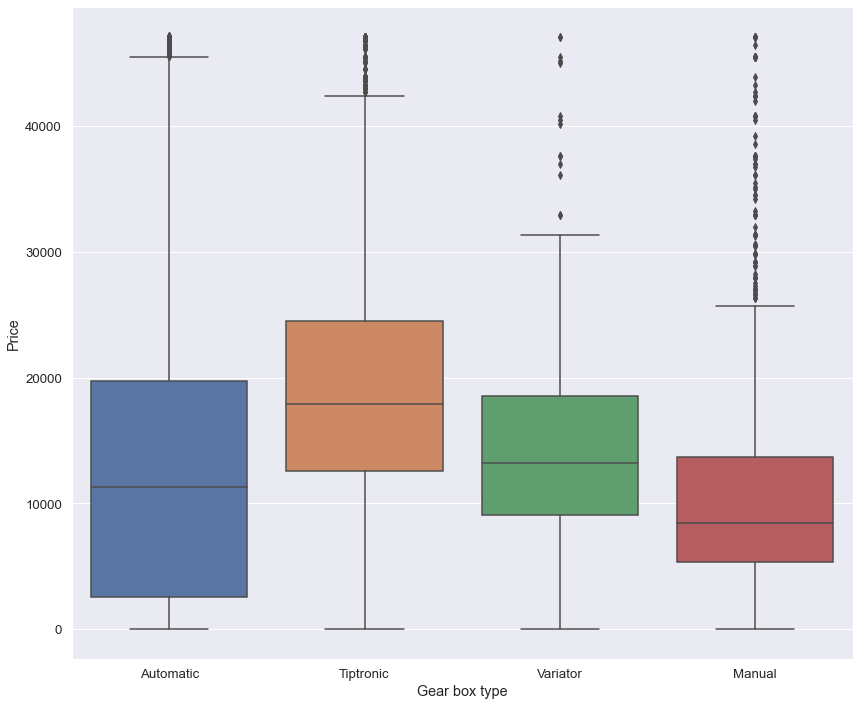

In [162]:
sns.boxplot(x="Gear box type",y="Price",data=df)

<AxesSubplot:xlabel='Gear box type', ylabel='count'>

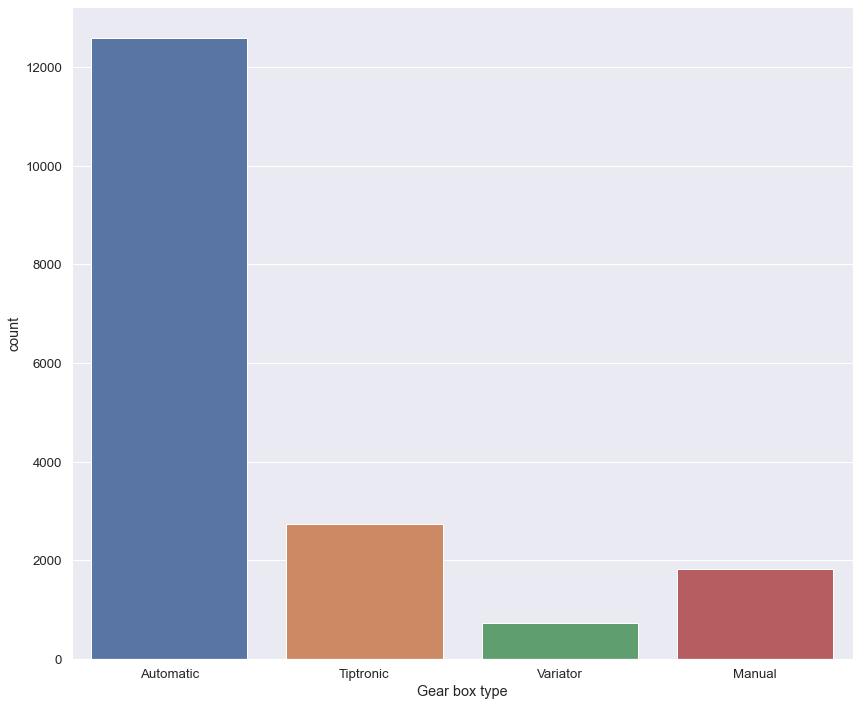

In [163]:
sns.countplot(x="Gear box type",data=df)

In [164]:
n_Gearboxtype=df['Gear box type'].value_counts().head(2)
n_Gearboxtype

Automatic    12593
Tiptronic     2736
Name: Gear box type, dtype: int64

In [165]:
Gearboxtype=n_Gearboxtype.index
Gearboxtype

Index(['Automatic', 'Tiptronic'], dtype='object')

In [166]:
df["Gear box type"]=df["Gear box type"].apply(lambda x: x if x in Gearboxtype else "Other" )

In [167]:
df=pd.get_dummies(df,columns=["Gear box type"])

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17869 entries, 0 to 19236
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       17869 non-null  int64  
 1   Prod. year                  17869 non-null  int64  
 2   Engine volume               17869 non-null  float64
 3   Mileage                     17869 non-null  int32  
 4   Cylinders                   17869 non-null  int32  
 5   Drive wheels                17869 non-null  object 
 6   Doors                       17869 non-null  object 
 7   Wheel                       17869 non-null  object 
 8   Color                       17869 non-null  object 
 9   Airbags                     17869 non-null  int64  
 10  Manufacturer_BMW            17869 non-null  uint8  
 11  Manufacturer_CHEVROLET      17869 non-null  uint8  
 12  Manufacturer_FORD           17869 non-null  uint8  
 13  Manufacturer_HYUNDAI        178

#### 14) Drive wheels

In [169]:
df["Drive wheels"].describe()

count     17869
unique        3
top       Front
freq      12155
Name: Drive wheels, dtype: object

<AxesSubplot:xlabel='Drive wheels', ylabel='Price'>

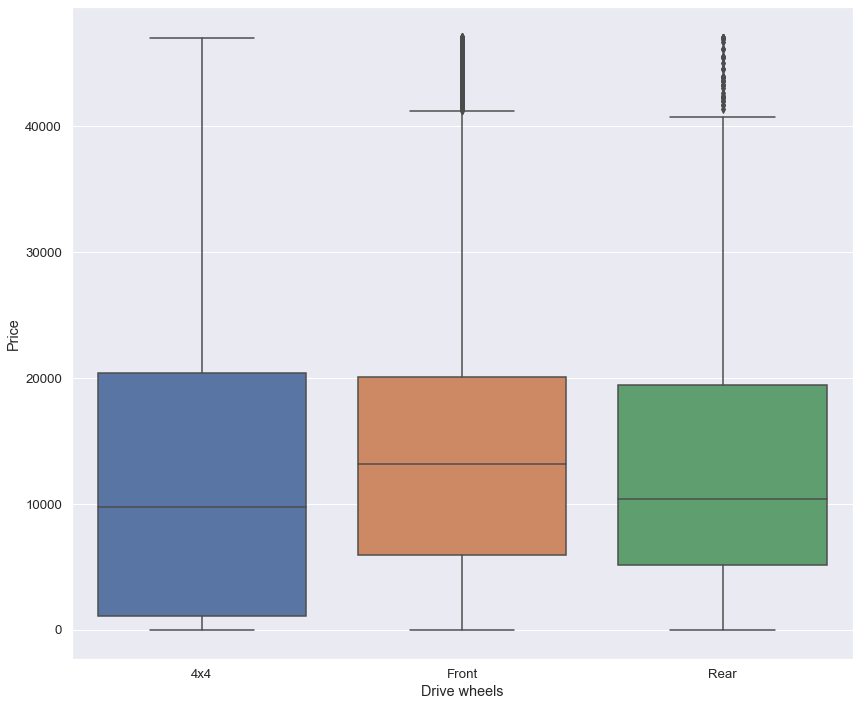

In [170]:
sns.boxplot(x="Drive wheels",y='Price',data=df)

In [171]:
df=pd.get_dummies(df,columns=["Drive wheels"],drop_first=True)

#### 15) Doors

In [172]:
df.drop(["Doors"],inplace=True,axis=1)

In [173]:
#df["Doors"].describe()

In [174]:
#df['Doors'].value_counts()

In [175]:
#for i in range(len(df)):
    #df.iloc[i,5]=df.iloc[i,5].replace("-Mar","")



In [176]:
#for i in range(len(df)):
#df.iloc[i,5]=df.iloc[i,5].replace("-May","")

In [177]:
#for i in range(len(df)):
  #  df.iloc[i,5]=df.iloc[i,5].replace(">5","+5")    

In [178]:
df.head()

,Price,Prod. year,Engine volume,Mileage,Cylinders,Wheel,Color,Airbags,Manufacturer_BMW,Manufacturer_CHEVROLET,...,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Other,Gear box type_Tiptronic,Drive wheels_Front,Drive wheels_Rear
0,13328,2010,3.5,186005,6,Left wheel,Silver,12,0,0,...,1,0,0,0,0,1,0,0,0,0
1,16621,2011,3.0,192000,6,Left wheel,Black,8,0,1,...,0,0,0,1,0,0,0,1,0,0
2,8467,2006,1.3,200000,4,Right-hand drive,Black,2,0,0,...,0,0,0,1,0,0,1,0,1,0
3,3607,2011,2.5,168966,4,Left wheel,White,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,11726,2014,1.3,91901,4,Left wheel,Silver,4,0,0,...,0,0,0,1,0,1,0,0,1,0


In [179]:
#df["Doors"]=df["Doors"].astype("int64")

#### 16) Wheel

In [180]:
df["Wheel"].describe()

count          17869
unique             2
top       Left wheel
freq           16420
Name: Wheel, dtype: object

<AxesSubplot:xlabel='Wheel', ylabel='Price'>

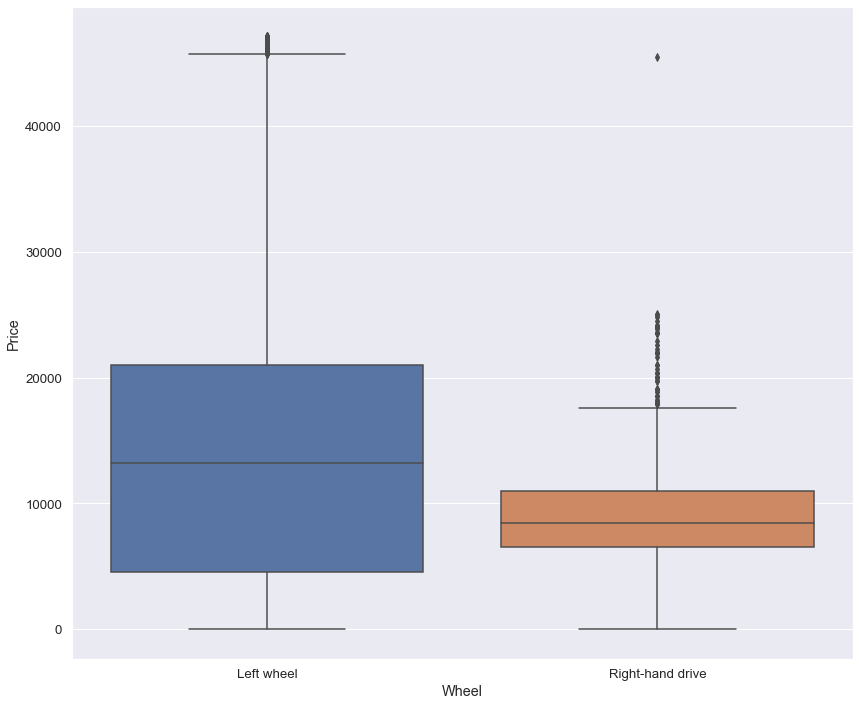

In [181]:
sns.boxplot(x="Wheel",y="Price",data=df)

In [182]:
df=pd.get_dummies(df,columns=['Wheel'],drop_first=True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17869 entries, 0 to 19236
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       17869 non-null  int64  
 1   Prod. year                  17869 non-null  int64  
 2   Engine volume               17869 non-null  float64
 3   Mileage                     17869 non-null  int32  
 4   Cylinders                   17869 non-null  int32  
 5   Color                       17869 non-null  object 
 6   Airbags                     17869 non-null  int64  
 7   Manufacturer_BMW            17869 non-null  uint8  
 8   Manufacturer_CHEVROLET      17869 non-null  uint8  
 9   Manufacturer_FORD           17869 non-null  uint8  
 10  Manufacturer_HYUNDAI        17869 non-null  uint8  
 11  Manufacturer_MERCEDES-BENZ  17869 non-null  uint8  
 12  Manufacturer_Other          17869 non-null  uint8  
 13  Manufacturer_TOYOTA         178

#### 17) Color

<AxesSubplot:xlabel='Color', ylabel='Price'>

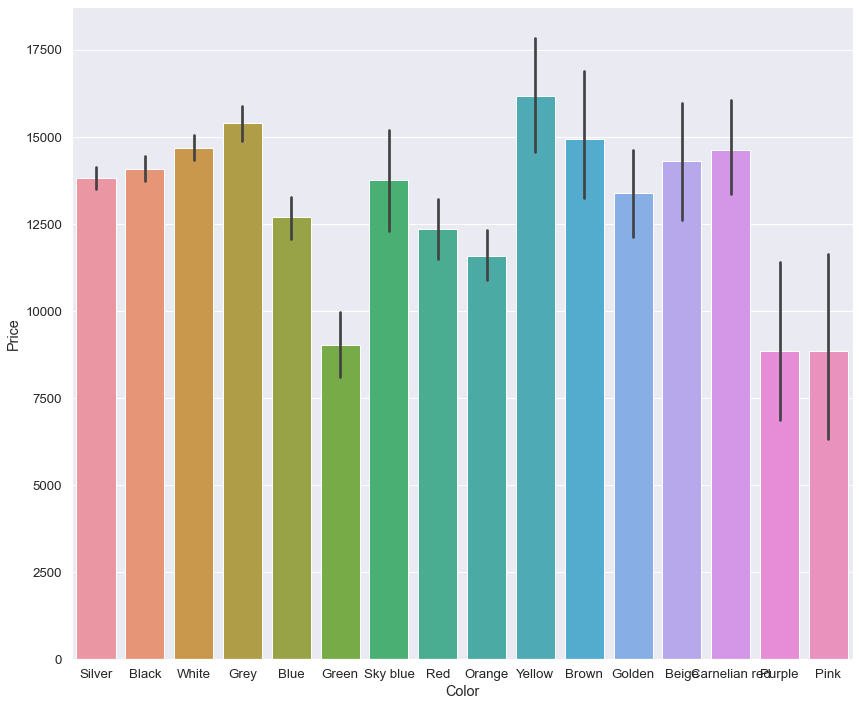

In [184]:
sns.barplot(y="Price",x='Color',data=df)

In [185]:
df.drop(["Color"],inplace=True,axis=1)

In [186]:
df.iloc[:,0:6]

,Price,Prod. year,Engine volume,Mileage,Cylinders,Airbags
0,13328,2010,3.5,186005,6,12
1,16621,2011,3.0,192000,6,8
2,8467,2006,1.3,200000,4,2
3,3607,2011,2.5,168966,4,0
4,11726,2014,1.3,91901,4,4
...,...,...,...,...,...,...
19232,8467,1999,2.0,300000,4,5
19233,15681,2011,2.4,161600,4,8
19234,26108,2010,2.0,116365,4,4
19235,5331,2007,2.0,51258,4,4


## step4: Model

#### 1) split data

In [187]:
df["Price"].describe()

count    17869.000000
mean     14040.091779
std      11383.928975
min          1.000000
25%       4861.000000
50%      12231.000000
75%      20071.000000
max      47120.000000
Name: Price, dtype: float64

In [188]:
df["class_price"]=0
for i in range (241):
    df["class_price"]=df["class_price"].mask(df["Price"].between((i*200),((i+1)*200)),i)

In [189]:
df.head()

,Price,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_FORD,Manufacturer_HYUNDAI,...,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Other,Gear box type_Tiptronic,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,class_price
0,13328,2010,3.5,186005,6,12,0,0,0,0,...,0,0,0,1,0,0,0,0,0,66
1,16621,2011,3.0,192000,6,8,0,1,0,0,...,0,1,0,0,0,1,0,0,0,83
2,8467,2006,1.3,200000,4,2,0,0,0,0,...,0,1,0,0,1,0,1,0,1,42
3,3607,2011,2.5,168966,4,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,18
4,11726,2014,1.3,91901,4,4,0,0,0,0,...,0,1,0,1,0,0,1,0,0,58


In [190]:
df.drop(["Price"],inplace=True,axis=1)

In [191]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df.iloc[:,:5]=scaler.fit_transform(df.iloc[:,:5])

In [192]:
x=df.drop("class_price",axis=1)
y=df["class_price"]
x

,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_FORD,Manufacturer_HYUNDAI,Manufacturer_MERCEDES-BENZ,...,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Other,Gear box type_Tiptronic,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive
0,-0.117071,1.427610,-0.029000,1.256101,1.255022,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.060861,0.844069,-0.028881,1.256101,0.330220,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,-0.828800,-1.139970,-0.028722,-0.470989,-1.056983,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
3,0.060861,0.260528,-0.029340,-0.470989,-1.519384,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.594657,-1.139970,-0.030874,-0.470989,-0.594582,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-2.074326,-0.323013,-0.026730,-0.470989,-0.363382,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
19233,0.060861,0.143820,-0.029486,-0.470989,0.330220,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
19234,-0.117071,-0.323013,-0.030387,-0.470989,-0.594582,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
19235,-0.650868,-0.323013,-0.031684,-0.470989,-0.594582,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [193]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=40)


In [194]:
#scaler=StandardScaler()
#x=scaler.fit_transform(x)

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [96]:
models = {
    "LR": LinearRegression(),
    "KNN" : KNeighborsRegressor(), 
    #"SVR": SVR(),
    #'SVC':SVC(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(n_estimators=80),
    "RFC": RandomForestClassifier(),
    "XGBC": XGBClassifier(n_estimators=70),
    "XGBR": XGBRegressor(n_estimators=70)
}

In [97]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*30)

Using model: LR
Training Score: 0.3106999331499041
Test Score: 0.3002098174637198
------------------------------
Using model: KNN
Training Score: 0.7999308695863817
Test Score: 0.7200622696435255
------------------------------
Using model: DT
Training Score: 0.9888155141731629
Test Score: 0.6292925985572839
------------------------------
Using model: RF
Training Score: 0.9553151546229492
Test Score: 0.8016025889845999
------------------------------
Using model: RFC
Training Score: 0.9777908689248895
Test Score: 0.30201342281879195
------------------------------
Using model: XGBC


C:\Users\MAS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MAS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score: 0.8407658321060383
Test Score: 0.2807606263982103

C:\Users\MAS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



------------------------------
Using model: XGBR


C:\Users\MAS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Training Score: 0.8151706813752053
Test Score: 0.751895193030202
------------------------------


C:\Users\MAS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


## save model

In [99]:
model=XGBRegressor(n_estimators=70)
model.fit(x_train, y_train)

C:\Users\MAS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=70, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [100]:
features=x.columns
features

Index(['Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags',
       'Manufacturer_BMW', 'Manufacturer_CHEVROLET', 'Manufacturer_FORD',
       'Manufacturer_HYUNDAI', 'Manufacturer_MERCEDES-BENZ',
       'Manufacturer_Other', 'Manufacturer_TOYOTA', 'Turbo',
       'Leather interior_Yes', 'Category_Coupe', 'Category_Hatchback',
       'Category_Jeep', 'Category_Minivan', 'Category_Other', 'Category_Sedan',
       'Category_Universal', 'Fuel type_Diesel', 'Fuel type_Hybrid',
       'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol',
       'Fuel type_Plug-in Hybrid', 'Gear box type_Automatic',
       'Gear box type_Other', 'Gear box type_Tiptronic', 'Drive wheels_Front',
       'Drive wheels_Rear', 'Wheel_Right-hand drive'],
      dtype='object')

In [101]:
import joblib

joblib.dump(model, 'model.h5')

joblib.dump(features, 'features.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [102]:
import joblib
import numpy as np

model=joblib.load('model.h5')

features=joblib.load('features.h5')
scaler=joblib.load('scaler.h5')


In [103]:
features

Index(['Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags',
       'Manufacturer_BMW', 'Manufacturer_CHEVROLET', 'Manufacturer_FORD',
       'Manufacturer_HYUNDAI', 'Manufacturer_MERCEDES-BENZ',
       'Manufacturer_Other', 'Manufacturer_TOYOTA', 'Turbo',
       'Leather interior_Yes', 'Category_Coupe', 'Category_Hatchback',
       'Category_Jeep', 'Category_Minivan', 'Category_Other', 'Category_Sedan',
       'Category_Universal', 'Fuel type_Diesel', 'Fuel type_Hybrid',
       'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol',
       'Fuel type_Plug-in Hybrid', 'Gear box type_Automatic',
       'Gear box type_Other', 'Gear box type_Tiptronic', 'Drive wheels_Front',
       'Drive wheels_Rear', 'Wheel_Right-hand drive'],
      dtype='object')